In [1]:
!pip install efficientnet

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from efficientnet.tfkeras import EfficientNetB0


C:\Users\mveiy\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
# Step 1: Prepare the Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    './OR/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    './OR/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
) wef24ftg5rt437w eu  y          

Found 1346 images belonging to 3 classes.
Found 1346 images belonging to 3 classes.


In [4]:
# Step 2: Build the Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
output = layers.Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [5]:
# Step 3: Compile the Model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Step 4: Train the Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
43/43 [==============================] - 15647s 370s/step - loss: 0.7475 - accuracy: 0.6857 - val_loss: 2.2718 - val_accuracy: 0.3343
Epoch 2/10
43/43 [==============================] - 2975s 69s/step - loss: 0.4549 - accuracy: 0.8150 - val_loss: 2.2783 - val_accuracy: 0.3960
Epoch 3/10
43/43 [==============================] - 2915s 68s/step - loss: 0.4082 - accuracy: 0.8254 - val_loss: 1.6892 - val_accuracy: 0.5163
Epoch 4/10
43/43 [==============================] - 2606s 60s/step - loss: 0.3830 - accuracy: 0.8395 - val_loss: 2.5762 - val_accuracy: 0.5706
Epoch 5/10
43/43 [==============================] - 2259s 52s/step - loss: 0.3074 - accuracy: 0.8700 - val_loss: 4.0945 - val_accuracy: 0.5215
Epoch 6/10
43/43 [==============================] - 2155s 50s/step - loss: 0.3109 - accuracy: 0.8782 - val_loss: 0.7132 - val_accuracy: 0.7415
Epoch 7/10
43/43 [==============================] - 2059s 48s/step - loss: 0.2957 - accuracy: 0.8685 - val_loss: 0.8854 - val_accuracy: 0.71

In [7]:
# Step 5: Evaluate the Model
loss, accuracy = model.evaluate(validation_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

43/43 [==============================] - 328s 8s/step - loss: 0.3987 - accuracy: 0.8574
Test Loss: 0.3987017273902893
Test Accuracy: 0.8573551177978516


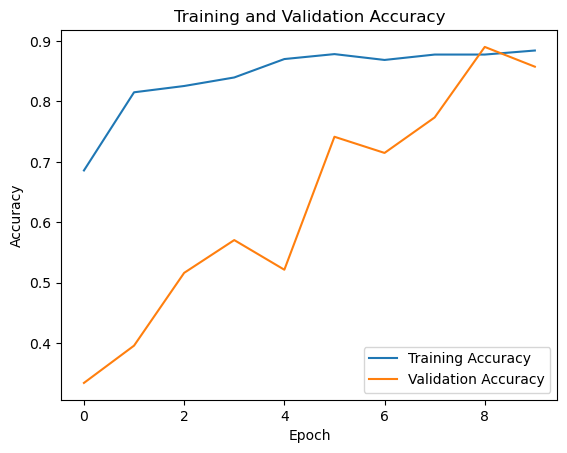

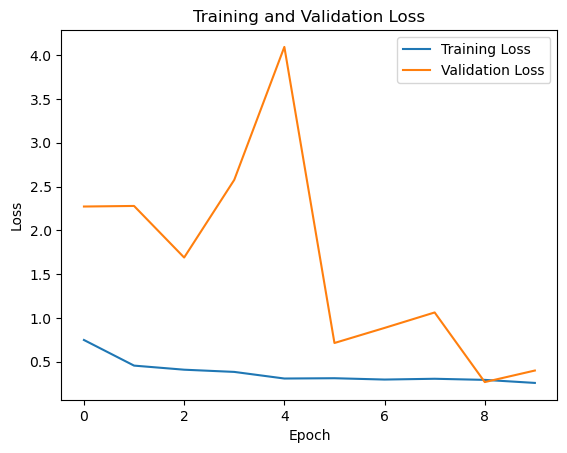

In [8]:
# Step 6: Plot Accuracy and Loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()